In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_excel("unicorn_data.xlsx", index_col = 0)
df.columns = ["valuation", "category", "country", "funding", "investors"]

print(df.head())
print(df.shape)

           valuation                      category        country  funding  \
Company                                                                      
17zuoye         1000  Internet Software & Services          China    385.0   
23andMe         1615                    Healthcare  United States    794.1   
4Paradigm       1200  Internet Software & Services          China    145.0   
9f Group        1000                       Fintech          China    178.0   
About You       1000                    E-commerce        Germany    300.0   

                                                   investors  
Company                                                       
17zuoye                         DST Global, Temasek Holdings  
23andMe    Google Ventures, New Enterprise Associates, MP...  
4Paradigm  Sequoia Capital China, China Construction Bank...  
9f Group           China Cinda Asset Management, IDG Capital  
About You           German Media Pool, Seven Venture Capital  
(309, 5)


In [2]:
df['multiple'] = df.valuation/df.funding
print(df.head())

           valuation                      category        country  funding  \
Company                                                                      
17zuoye         1000  Internet Software & Services          China    385.0   
23andMe         1615                    Healthcare  United States    794.1   
4Paradigm       1200  Internet Software & Services          China    145.0   
9f Group        1000                       Fintech          China    178.0   
About You       1000                    E-commerce        Germany    300.0   

                                                   investors  multiple  
Company                                                                 
17zuoye                         DST Global, Temasek Holdings  2.597403  
23andMe    Google Ventures, New Enterprise Associates, MP...  2.033749  
4Paradigm  Sequoia Capital China, China Construction Bank...  8.275862  
9f Group           China Cinda Asset Management, IDG Capital  5.617978  
About You      

# 1. Data summary

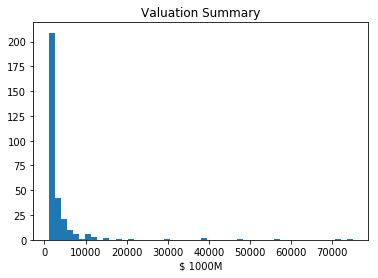

[  1000.    1600.   10779.2]


In [18]:
plt.hist(df.valuation, bins =50)
plt.title("Valuation Summary")
plt.xlabel("$ 1000M")
plt.show()
print(np.percentile(df.valuation, [10,50, 95]))

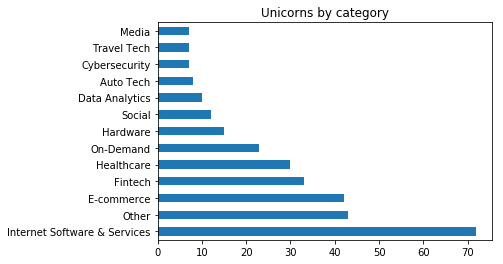

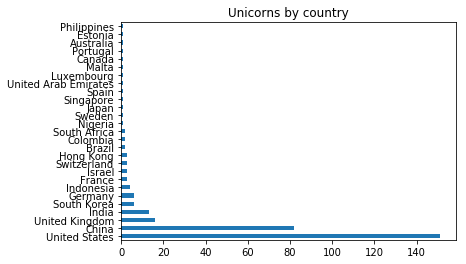

In [4]:
df.category.value_counts().plot(kind= "barh")
plt.title("Unicorns by category")
plt.show()

df.country.value_counts().plot(kind ="barh")
plt.title("Unicorns by country")
plt.show()

# 2. Country-level data 

In [5]:
df[df.country == "Indonesia"]

,valuation,category,country,funding,investors,multiple
Company,,,,,,
Bukalapak,1000,E-commerce,Indonesia,50.1,"500 Startups, Batavia Incubator, Emtek Group",19.960080
GO-JEK,5000,On-Demand,Indonesia,2235.0,"Formation Group, Sequoia Capital India, Warbur...",2.237136
Tokopedia,7000,E-commerce,Indonesia,2447.7,"SoftBankGroup, Alibaba Group, Sequoia Capital ...",2.859828
Traveloka Indonesia,2000,Travel Tech,Indonesia,500.0,"Global Founders Capital, East Ventures, Expedi...",4.000000


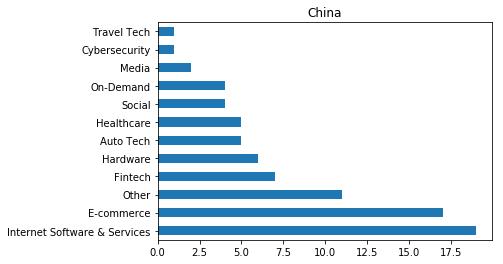

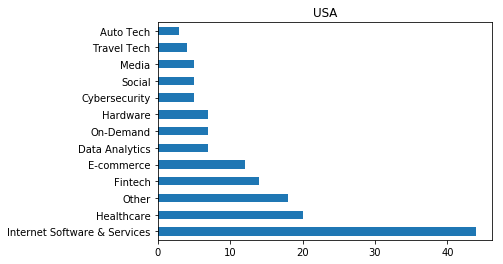

In [6]:
df[df.country == "China"].category.value_counts().plot(kind='barh')
plt.title("China")
plt.show()

df[df.country == "United States"].category.value_counts().plot(kind='barh')
plt.title("USA")
plt.show()

#print(df[(df.country =="United States") & (df.category == "Healthcare")])

# 3. Valuation and funding

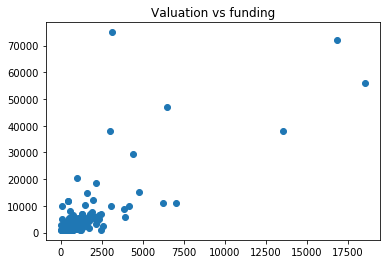

         valuation    category        country  funding  \
Company                                                  
GoodRx        2800  Healthcare  United States      1.0   

                                                investors  multiple  
Company                                                              
GoodRx   Silver Lake Partners, SV Angel, Upfront Ventures    2800.0  


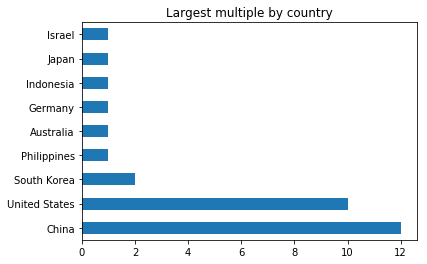

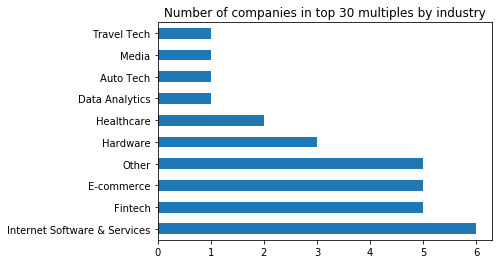

In [19]:
plt.scatter(df.funding, df.valuation)
plt.title("Valuation vs funding")
plt.show()

print(df.nlargest(1, "multiple"))

large_multiple = df.nlargest(30, "multiple")
large_multiple.country.value_counts().plot(kind = "barh")
plt.title("Largest multiple by country")
plt.show()

large_multiple.category.value_counts().plot(kind = "barh")
plt.title("Number of companies in top 30 multiples by industry")
plt.show()




# 4. Investors

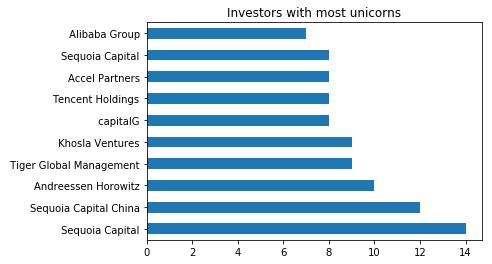

In [8]:
from itertools import chain

investors = df.investors.apply(lambda x: x.split(',')).tolist()
investors = pd.Series(list(chain.from_iterable(investors)))

investors.value_counts().nlargest(10).plot(kind = "barh")
plt.title("Investors with most unicorns")
plt.show()